### Imports

In [16]:
import json

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display, HTML

In [4]:
train_df=pd.read_csv('/workspace/data/train_set.csv', index_col='trip_id', low_memory=False)
test_df=pd.read_csv('/workspace/data/test_set.csv', index_col='trip_id', low_memory=False)

### Pre-EDA | Cleaning

#### Describe

In [172]:
# https://bikeshare.metro.net/about/data/

In [5]:
train_df.shape

(700000, 13)

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 700000 entries, 101750280 to 167744702
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   duration             700000 non-null  int64  
 1   start_time           700000 non-null  object 
 2   end_time             700000 non-null  object 
 3   start_lat            694437 non-null  float64
 4   start_lon            694437 non-null  float64
 5   end_lat              681426 non-null  float64
 6   end_lon              681426 non-null  float64
 7   bike_id              700000 non-null  object 
 8   plan_duration        699792 non-null  float64
 9   trip_route_category  700000 non-null  object 
 10  passholder_type      697424 non-null  object 
 11  start_station        700000 non-null  int64  
 12  end_station          700000 non-null  int64  
dtypes: float64(5), int64(3), object(5)
memory usage: 74.8+ MB


In [7]:
train_df[['start_time', 'end_time']][:10]

,start_time,end_time
trip_id,,
101750280,2018-08-07 11:20:00,2018-08-07 11:55:00
46560345,9/17/2017 17:51,9/17/2017 18:23
120016336,2019-04-22 09:22:00,2019-04-22 09:28:00
129547190,9/22/2019 11:27,9/22/2019 13:45
136619463,1/31/2020 17:11,1/31/2020 17:25
63406498,2017-12-16 15:18:00,2017-12-16 15:48:00
25033469,2017-04-15 22:02:00,2017-04-15 22:13:00
107479459,2018-10-16 17:27:00,2018-10-16 17:42:00
132750788,2019-11-16 11:24:27,2019-11-16 11:43:49


In [8]:
train_df.describe(include='all', datetime_is_numeric=True).T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
duration,700000.0,NaN,NaN,NaN,37.084979,125.30251,1.0,7.0,13.0,26.0,1440.0
start_time,700000,567695,2018-10-03 09:29:00,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
end_time,700000,547772,2018-07-17 17:08:00,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
start_lat,694437.0,NaN,NaN,NaN,34.044952,0.325255,33.710979,34.03746,34.046612,34.051941,55.705528
start_lon,694437.0,NaN,NaN,NaN,-118.253849,2.33264,-118.495422,-118.280952,-118.25698,-118.247162,118.238258
end_lat,681426.0,NaN,NaN,NaN,34.044175,0.299721,33.710979,34.037048,34.04652,34.050911,55.705528
end_lon,681426.0,NaN,NaN,NaN,-118.259183,2.129781,-118.495422,-118.280952,-118.256981,-118.246422,37.606541
bike_id,700000,4356,19544,1312,NaN,NaN,NaN,NaN,NaN,NaN,NaN
plan_duration,699792.0,NaN,NaN,NaN,44.928697,92.816296,0.0,1.0,30.0,30.0,999.0
trip_route_category,700000,2,One Way,582076,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
display(HTML(train_df.sample(10).T.to_html()))

trip_id,11582711,179208308,151382494,39001630,91885307,176106173,134403727,105593568,102214155,27999017
duration,15,70,10,13,48,10,64,15,1,18
start_time,2016-10-28 12:43:00,12/28/2021 14:44,12/23/2020 15:23,8/7/2017 8:52,2018-06-13 10:18:00,11/13/2021 0:23,2019-12-21 16:40:37,2018-09-18 16:11:00,2018-08-09 16:56:00,2017-05-18 15:14:00
end_time,2016-10-28 12:58:00,12/28/2021 15:54,12/23/2020 15:33,8/7/2017 9:05,2018-06-13 11:06:00,11/13/2021 0:33,2019-12-21 17:44:08,2018-09-18 16:26:00,2018-08-09 16:57:00,2017-05-18 15:32:00
start_lat,34.0485,33.989079,34.043732,34.05661,33.998341,34.075611,33.988419,34.044701,33.984928,34.034801
start_lon,-118.258537,-118.462257,-118.260139,-118.237213,-118.461014,-118.291862,-118.45163,-118.252441,-118.469963,-118.231277
end_lat,34.038609,34.023392,34.038609,34.05048,33.99556,34.069271,NaN,34.046822,33.984928,34.05661
end_lon,-118.260857,-118.479637,-118.260857,-118.254593,-118.481552,-118.296593,NaN,-118.248352,-118.469963,-118.237213
bike_id,06564,16113,16422,6201,05741,12409,15130,06609,12440,06403
plan_duration,30.0,1.0,30.0,30.0,0.0,1.0,1.0,30.0,1.0,0.0
trip_route_category,One Way,One Way,One Way,One Way,One Way,One Way,One Way,One Way,Round Trip,One Way


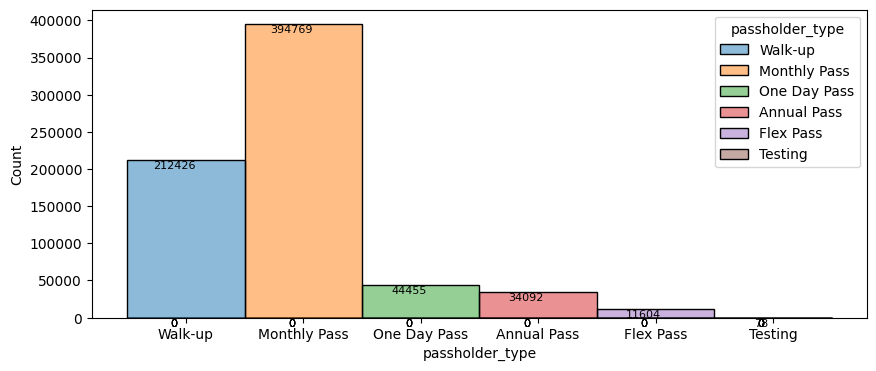

In [10]:
plt.figure(figsize=(10,4))
ax=sns.histplot(data=train_df, x='passholder_type', hue='passholder_type')
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()-10), ha='center', va='center', size=8)

### Transform

In [11]:
#Find null values
na_sum=train_df.isna().sum()
na_percent=(((train_df.isna().sum()) / (len(train_df))) *100).round(2)
null_sum=train_df.isnull().sum()
null_percent=(((train_df.isnull().sum()) / (len(train_df))) *100).round(2)
null_sum.name='NULL_sum'
null_percent.name='NULL_%(0./100.)'
na_sum.name='NAL_sum'
na_percent.name='NA_%(0./100.)'

pd.concat([null_sum,null_percent, na_sum, na_percent], axis=1)

,NULL_sum,NULL_%(0./100.),NAL_sum,NA_%(0./100.)
duration,0,0.00,0,0.00
start_time,0,0.00,0,0.00
end_time,0,0.00,0,0.00
start_lat,5563,0.79,5563,0.79
start_lon,5563,0.79,5563,0.79
end_lat,18574,2.65,18574,2.65
end_lon,18574,2.65,18574,2.65
bike_id,0,0.00,0,0.00
plan_duration,208,0.03,208,0.03
trip_route_category,0,0.00,0,0.00


In [12]:
# Inspect null values
train_df[train_df.isna().any(axis=1)].sample(20)

,duration,start_time,end_time,start_lat,start_lon,end_lat,end_lon,bike_id,plan_duration,trip_route_category,passholder_type,start_station,end_station
trip_id,,,,,,,,,,,,,
126291151,30,7/28/2019 12:04,7/28/2019 12:34,NaN,NaN,NaN,NaN,16087,1.0,One Way,Walk-up,4285,3000
133945345,36,2019-12-12 15:05:22,2019-12-12 15:41:46,NaN,NaN,NaN,NaN,15442,1.0,Round Trip,One Day Pass,4285,4285
144858451,16,7/13/2020 21:11,7/13/2020 21:27,NaN,NaN,34.168350,-118.387497,15233,1.0,One Way,One Day Pass,4285,4414
140830440,20,4/13/2020 15:39,4/13/2020 15:59,34.090279,-118.277191,NaN,NaN,17072,30.0,One Way,Monthly Pass,4493,3000
81427109,40,2018-04-11 19:01:00,2018-04-11 19:41:00,34.044159,-118.251579,NaN,NaN,05847,30.0,One Way,Monthly Pass,3055,3000
153286997,159,2/10/2021 9:19,2/10/2021 11:58,34.056610,-118.237213,NaN,NaN,20176,365.0,One Way,Annual Pass,3014,3000
79232444,4,2018-03-29 17:13:00,2018-03-29 17:17:00,34.051941,-118.243530,NaN,NaN,06146,30.0,One Way,Monthly Pass,3030,3000
66938017,85,2018-01-10 13:31:00,2018-01-10 14:56:00,34.046070,-118.233093,NaN,NaN,06650,1.0,One Way,One Day Pass,3022,3000
175939169,30,11/10/2021 17:10,11/10/2021 17:40,34.041691,-118.235352,NaN,NaN,6349,30.0,One Way,Monthly Pass,3048,3000


In [13]:
# Remove NULL
train_df=train_df.dropna()
test_df=test_df.dropna()

In [14]:
train_df.nunique()


duration                 1410
start_time             551401
end_time               531316
start_lat                 336
start_lon                 434
end_lat                   341
end_lon                   439
bike_id                  4341
plan_duration               6
trip_route_category         2
passholder_type             6
start_station             362
end_station               366
dtype: int64

[Text(0.5, 1.0, 'Passholder class after null cleaning')]

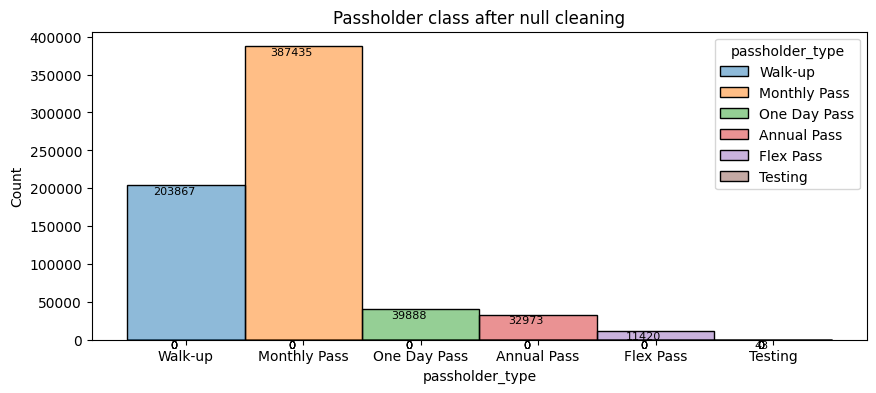

In [15]:
plt.figure(figsize=(10,4))
ax=sns.histplot(data=train_df, x='passholder_type', hue='passholder_type')
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()-10), ha='center', va='center', size=8)

ax.set(title='Passholder class after null cleaning')

In [16]:
# Format datetime columns
train_df['start_time']=train_df['start_time'].apply(pd.to_datetime)
train_df['end_time']=train_df['end_time'].apply(pd.to_datetime)
test_df['start_time']=test_df['start_time'].apply(pd.to_datetime)
test_df['end_time']=test_df['end_time'].apply(pd.to_datetime)

[Text(0.5, 1.0, 'Duration')]

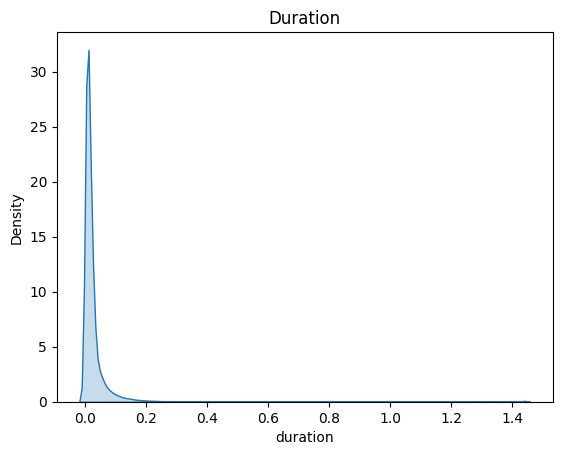

In [17]:
# Duration density
plot=sns.kdeplot(train_df['duration']/1000, fill=True)
plot.set(title="Duration")

[Text(0.5, 1.0, 'Duration_LOG')]

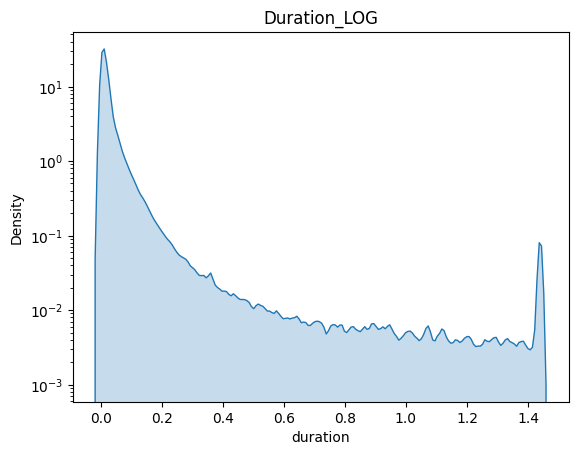

In [18]:
plot=sns.kdeplot(train_df['duration']/1000, fill=True, log_scale=[False, True])
plot.set(title="Duration_LOG")

In [19]:
plan_duration_grouped=train_df.groupby('plan_duration', sort=False, as_index=False).count()
plan_duration_grouped

,plan_duration,duration,start_time,end_time,start_lat,start_lon,end_lat,end_lon,bike_id,trip_route_category,passholder_type,start_station,end_station
0,1.0,174132,174132,174132,174132,174132,174132,174132,174132,174132,174132,174132,174132
1,0.0,61816,61816,61816,61816,61816,61816,61816,61816,61816,61816,61816,61816
2,30.0,389151,389151,389151,389151,389151,389151,389151,389151,389151,389151,389151,389151
3,365.0,50328,50328,50328,50328,50328,50328,50328,50328,50328,50328,50328,50328
4,150.0,156,156,156,156,156,156,156,156,156,156,156,156
5,999.0,43,43,43,43,43,43,43,43,43,43,43,43


In [20]:
train_df[train_df['plan_duration'] == 999.0]

,duration,start_time,end_time,start_lat,start_lon,end_lat,end_lon,bike_id,plan_duration,trip_route_category,passholder_type,start_station,end_station
trip_id,,,,,,,,,,,,,
132008969,1,2019-11-03 11:56:52,2019-11-03 11:57:16,33.984928,-118.469963,33.984928,-118.469963,15483,999.0,Round Trip,Testing,4347,4347
129898045,18,2019-09-28 10:53:00,2019-09-28 11:11:00,34.150688,-118.366127,34.152000,-118.350601,15850,999.0,One Way,Testing,4418,4425
129538183,33,2019-09-22 10:02:00,2019-09-22 10:35:00,33.997231,-118.445969,33.997231,-118.445969,15114,999.0,Round Trip,Testing,4333,4333
133598990,9,2019-12-05 09:12:20,2019-12-05 09:21:51,33.994850,-118.417961,33.980789,-118.414902,15723,999.0,One Way,Testing,4460,4394
127268537,39,2019-08-14 15:15:00,2019-08-14 15:54:00,33.995560,-118.481552,34.014309,-118.491341,15969,999.0,One Way,Testing,4345,4344
142601654,10,2020-05-26 19:42:00,2020-05-26 19:52:00,33.984341,-118.471550,33.984341,-118.471550,15964,999.0,Round Trip,Testing,4346,4346
138572793,1,2020-03-03 12:43:00,2020-03-03 12:44:00,34.014309,-118.491341,34.014309,-118.491341,15952,999.0,Round Trip,Testing,4344,4344
131548279,16,2019-10-26 15:32:09,2019-10-26 15:48:03,34.022449,-118.438332,34.017681,-118.409081,15125,999.0,One Way,Testing,4336,4354
129187188,1,2019-09-16 08:59:00,2019-09-16 09:00:00,33.995560,-118.481552,33.995560,-118.481552,15534,999.0,Round Trip,Testing,4345,4345


In [21]:
train_df[train_df['plan_duration'] == 150.0]

,duration,start_time,end_time,start_lat,start_lon,end_lat,end_lon,bike_id,plan_duration,trip_route_category,passholder_type,start_station,end_station
trip_id,,,,,,,,,,,,,
98749274,1,2018-07-23 14:18:00,2018-07-23 14:19:00,34.038609,-118.260857,34.038609,-118.260857,11978,150.0,Round Trip,Monthly Pass,3019,3019
104138440,4,2018-08-27 17:34:00,2018-08-27 17:38:00,34.044170,-118.261169,34.039982,-118.266403,12243,150.0,One Way,Monthly Pass,3074,3047
106459520,7,2018-10-01 18:16:00,2018-10-01 18:23:00,34.037460,-118.265381,34.039982,-118.266403,12401,150.0,One Way,Monthly Pass,3056,3047
99337976,5,2018-07-26 16:50:00,2018-07-26 16:55:00,34.032860,-118.268082,34.037460,-118.265381,06501,150.0,One Way,Monthly Pass,3025,3056
96453031,3,2018-07-10 16:43:00,2018-07-10 16:46:00,34.137859,-118.122414,34.137951,-118.128502,06666,150.0,One Way,Monthly Pass,4176,4180
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95109141,40,2018-07-02 14:19:00,2018-07-02 14:59:00,34.038609,-118.260857,34.038609,-118.260857,06577,150.0,Round Trip,Monthly Pass,3019,3019
99128691,25,2018-07-25 14:09:00,2018-07-25 14:34:00,34.038609,-118.260857,34.038609,-118.260857,12456,150.0,Round Trip,Monthly Pass,3019,3019
103780186,4,2018-08-22 07:21:00,2018-08-22 07:25:00,34.039982,-118.266403,34.038609,-118.260857,06371,150.0,One Way,Monthly Pass,3047,3019


In [22]:
train_df[train_df['duration'] == 1440]

,duration,start_time,end_time,start_lat,start_lon,end_lat,end_lon,bike_id,plan_duration,trip_route_category,passholder_type,start_station,end_station
trip_id,,,,,,,,,,,,,
137752372,1440,2020-02-17 13:30:00,2020-02-18 16:17:00,33.984928,-118.469963,33.984341,-118.471550,15346,1.0,One Way,One Day Pass,4347,4346
46112491,1440,2017-09-14 03:37:00,2017-09-15 11:28:00,34.046612,-118.262733,34.026112,-118.238319,5716,0.0,One Way,Walk-up,3008,4118
141122232,1440,2020-04-18 22:31:00,2020-04-20 15:47:00,34.101891,-118.300613,34.109360,-118.271812,16283,1.0,One Way,One Day Pass,4406,4455
98693142,1440,2018-07-21 18:32:00,2018-07-23 07:12:00,34.051941,-118.243530,34.051941,-118.243530,06309,1.0,Round Trip,Walk-up,3030,3030
49501295,1440,2017-09-29 07:07:00,2017-10-02 18:04:00,34.028511,-118.256668,34.051941,-118.243530,6581,30.0,One Way,Monthly Pass,3045,3030
...,...,...,...,...,...,...,...,...,...,...,...,...,...
137012623,1440,2020-02-06 11:22:00,2020-02-07 14:17:00,34.103630,-118.291313,34.092602,-118.280930,20105,1.0,One Way,One Day Pass,4451,4472
70552693,1440,2018-02-01 15:47:00,2018-02-02 20:51:00,34.050880,-118.248253,34.045181,-118.250237,05936,0.0,One Way,Walk-up,3069,3067
131919951,1440,2019-10-30 09:08:09,2019-11-01 16:09:55,34.049301,-118.238808,34.039188,-118.232529,12316,365.0,One Way,Annual Pass,3042,3036


In [23]:
passholder_grouped=train_df.groupby('passholder_type').count()
passholder_grouped

,duration,start_time,end_time,start_lat,start_lon,end_lat,end_lon,bike_id,plan_duration,trip_route_category,start_station,end_station
passholder_type,,,,,,,,,,,,
Annual Pass,32973,32973,32973,32973,32973,32973,32973,32973,32973,32973,32973,32973
Flex Pass,11420,11420,11420,11420,11420,11420,11420,11420,11420,11420,11420,11420
Monthly Pass,387435,387435,387435,387435,387435,387435,387435,387435,387435,387435,387435,387435
One Day Pass,39888,39888,39888,39888,39888,39888,39888,39888,39888,39888,39888,39888
Testing,43,43,43,43,43,43,43,43,43,43,43,43
Walk-up,203867,203867,203867,203867,203867,203867,203867,203867,203867,203867,203867,203867


In [24]:
train_df.loc[train_df['passholder_type'] == 'Testing']

,duration,start_time,end_time,start_lat,start_lon,end_lat,end_lon,bike_id,plan_duration,trip_route_category,passholder_type,start_station,end_station
trip_id,,,,,,,,,,,,,
132008969,1,2019-11-03 11:56:52,2019-11-03 11:57:16,33.984928,-118.469963,33.984928,-118.469963,15483,999.0,Round Trip,Testing,4347,4347
129898045,18,2019-09-28 10:53:00,2019-09-28 11:11:00,34.150688,-118.366127,34.152000,-118.350601,15850,999.0,One Way,Testing,4418,4425
129538183,33,2019-09-22 10:02:00,2019-09-22 10:35:00,33.997231,-118.445969,33.997231,-118.445969,15114,999.0,Round Trip,Testing,4333,4333
133598990,9,2019-12-05 09:12:20,2019-12-05 09:21:51,33.994850,-118.417961,33.980789,-118.414902,15723,999.0,One Way,Testing,4460,4394
127268537,39,2019-08-14 15:15:00,2019-08-14 15:54:00,33.995560,-118.481552,34.014309,-118.491341,15969,999.0,One Way,Testing,4345,4344
142601654,10,2020-05-26 19:42:00,2020-05-26 19:52:00,33.984341,-118.471550,33.984341,-118.471550,15964,999.0,Round Trip,Testing,4346,4346
138572793,1,2020-03-03 12:43:00,2020-03-03 12:44:00,34.014309,-118.491341,34.014309,-118.491341,15952,999.0,Round Trip,Testing,4344,4344
131548279,16,2019-10-26 15:32:09,2019-10-26 15:48:03,34.022449,-118.438332,34.017681,-118.409081,15125,999.0,One Way,Testing,4336,4354
129187188,1,2019-09-16 08:59:00,2019-09-16 09:00:00,33.995560,-118.481552,33.995560,-118.481552,15534,999.0,Round Trip,Testing,4345,4345


In [25]:
test_df

,duration,start_time,end_time,start_lat,start_lon,end_lat,end_lon,bike_id,trip_route_category,start_station,end_station
trip_id,,,,,,,,,,,
17059130,12,2017-01-01 00:24:00,2017-01-01 00:36:00,34.058319,-118.246094,34.058319,-118.246094,6351,Round Trip,3028,3028
17059129,17,2017-01-01 00:28:00,2017-01-01 00:45:00,34.049980,-118.247162,34.043732,-118.260139,5836,One Way,3027,3018
17059126,20,2017-01-01 00:39:00,2017-01-01 00:59:00,34.063389,-118.236160,34.044159,-118.251579,6529,One Way,3066,3055
17059125,12,2017-01-01 00:43:00,2017-01-01 00:55:00,34.048851,-118.246422,34.050140,-118.233238,6029,One Way,3029,3079
17061379,48,2017-01-01 00:56:00,2017-01-01 01:44:00,34.049198,-118.252831,34.049198,-118.252831,6680,Round Trip,3063,3063
...,...,...,...,...,...,...,...,...,...,...,...
179408277,19,2021-12-31 23:29:00,2021-12-31 23:48:00,34.040989,-118.255798,34.041130,-118.267982,14027,One Way,3033,3011
179408276,8,2021-12-31 23:40:00,2021-12-31 23:48:00,34.044701,-118.252441,34.051941,-118.243530,20006,One Way,3031,3030
179409877,43,2021-12-31 23:47:00,2022-01-01 00:30:00,34.044701,-118.252441,34.044701,-118.252441,16214,Round Trip,3031,3031


In [26]:
# Remove unclear and NA values
train_df = train_df.loc[
    (train_df['passholder_type'] != 'Testing') &
    (train_df['plan_duration']!= 999.0) &
    (train_df['plan_duration']!= 150.0)
    ]

In [27]:
train_df.groupby('passholder_type')['duration'].describe()

,count,mean,std,min,25%,50%,75%,max
passholder_type,,,,,,,,
Annual Pass,32973.0,14.389015,50.602887,1.0,5.0,8.0,14.0,1440.0
Flex Pass,11420.0,16.029159,55.092246,1.0,6.0,9.0,14.0,1440.0
Monthly Pass,387279.0,16.271391,49.415735,1.0,6.0,9.0,17.0,1440.0
One Day Pass,39888.0,73.172257,147.859371,1.0,15.0,29.0,75.0,1440.0
Walk-up,203867.0,54.571804,132.770235,1.0,13.0,25.0,51.0,1440.0


In [28]:
train_df[['plan_duration']]

,plan_duration
trip_id,
101750280,1.0
46560345,0.0
120016336,30.0
129547190,1.0
136619463,30.0
...,...
83666862,30.0
132547303,30.0
67332628,365.0


In [29]:
train_df.loc[:, ('plan_duration')].astype('int')

trip_id
101750280      1
46560345       0
120016336     30
129547190      1
136619463     30
            ... 
83666862      30
132547303     30
67332628     365
114846232      1
167744702      1
Name: plan_duration, Length: 675427, dtype: int64

In [30]:
train_df.groupby('plan_duration').count()

,duration,start_time,end_time,start_lat,start_lon,end_lat,end_lon,bike_id,trip_route_category,passholder_type,start_station,end_station
plan_duration,,,,,,,,,,,,
0.0,61816,61816,61816,61816,61816,61816,61816,61816,61816,61816,61816,61816
1.0,174132,174132,174132,174132,174132,174132,174132,174132,174132,174132,174132,174132
30.0,389151,389151,389151,389151,389151,389151,389151,389151,389151,389151,389151,389151
365.0,50328,50328,50328,50328,50328,50328,50328,50328,50328,50328,50328,50328


In [31]:
train_df[['end_station']].value_counts()

end_station
3005           30430
3014           20661
3031           18342
3030           17382
4215           16905
               ...  
3000               3
4467               2
4468               2
4327               1
4143               1
Length: 366, dtype: int64

In [32]:
train_df[['end_station']].dtypes

end_station    int64
dtype: object

In [33]:
train_df.columns

Index(['duration', 'start_time', 'end_time', 'start_lat', 'start_lon',
       'end_lat', 'end_lon', 'bike_id', 'plan_duration', 'trip_route_category',
       'passholder_type', 'start_station', 'end_station'],
      dtype='object')

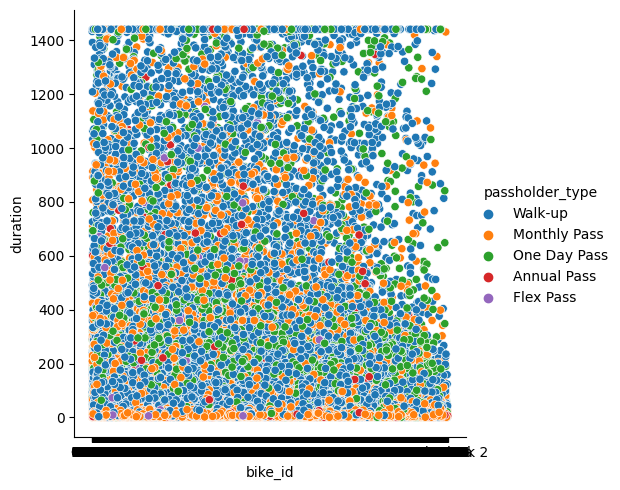

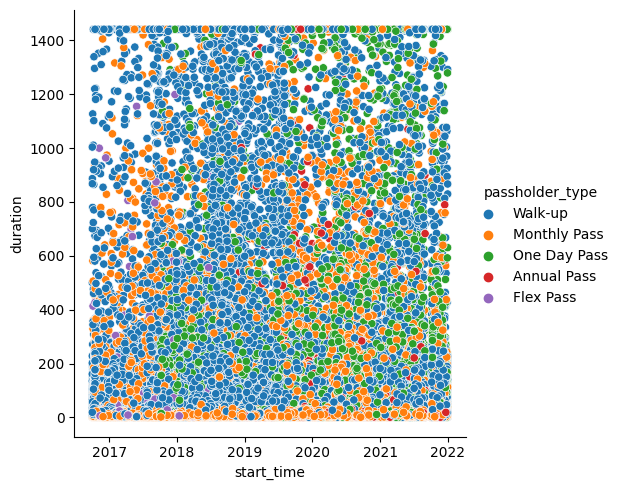

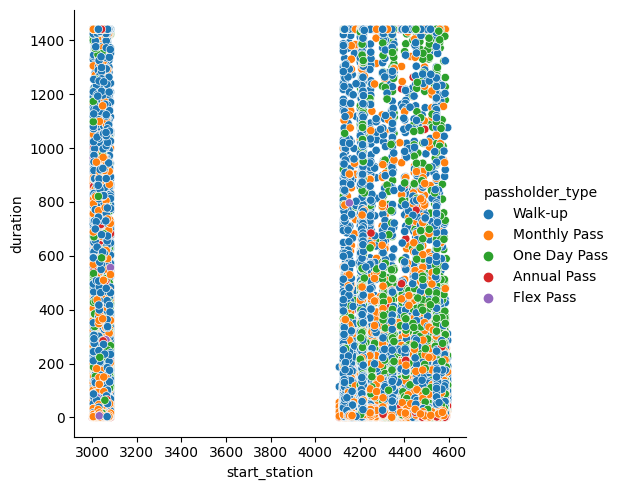

In [34]:
columns=["bike_id", 'start_time', 'start_station']

for col in columns:
    sns.relplot(data=train_df, x=col, y="duration", hue="passholder_type")

In [35]:
train_df.loc[:, ('start_station')]=train_df.loc[:, ('start_station')].astype('category')

In [36]:
# To categoricals
categoricals = ['start_station', 'end_station', 'bike_id', 'passholder_type', 'plan_duration', 'trip_route_category']

for col in categoricals:
    #train_df[[v]]=train_df[[v]].astype('category')
    train_df.loc[:, (col)]=train_df.loc[:, (col)].astype('category')
    if (col == 'passholder_type' or col ==  'plan_duration'):
        continue
    else:
        #test_df[[v]]=test_df[[v]].astype('category')
        train_df.loc[:, (col)]=train_df.loc[:, (col)].astype('category')

/tmp/ipykernel_1000/3615816246.py:6: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  train_df.loc[:, (col)]=train_df.loc[:, (col)].astype('category')
/tmp/ipykernel_1000/3615816246.py:11: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  train_df.loc[:, (col)]=train_df.loc[:, (col)].astype('category')
/tmp/ipykernel_1000/3615816246.py:11: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newval

In [37]:
train_df.dtypes

duration                        int64
start_time             datetime64[ns]
end_time               datetime64[ns]
start_lat                     float64
start_lon                     float64
end_lat                       float64
end_lon                       float64
bike_id                      category
plan_duration                category
trip_route_category          category
passholder_type              category
start_station                category
end_station                  category
dtype: object

In [38]:
train_df.describe(include='all', datetime_is_numeric=True).T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
duration,675427.0,NaN,NaN,NaN,31.096114,1.0,7.0,13.0,25.0,1440.0,92.750285
start_time,675427,NaN,NaN,NaN,2019-04-02 19:54:48.772598016,2016-10-01 00:48:00,2018-02-24 15:45:00,2019-03-05 22:10:00,2020-03-21 15:39:30,2021-12-31 22:57:00,NaN
end_time,675427,NaN,NaN,NaN,2019-04-02 20:27:24.913224960,2016-10-01 00:52:00,2018-02-24 16:23:00,2019-03-05 22:49:00,2020-03-21 16:26:30,2022-01-01 21:35:00,NaN
start_lat,675427.0,NaN,NaN,NaN,34.044957,33.710979,34.038609,34.046612,34.051941,55.705528,0.320075
start_lon,675427.0,NaN,NaN,NaN,-118.253708,-118.495422,-118.280182,-118.256668,-118.246422,118.238258,2.295689
end_lat,675427.0,NaN,NaN,NaN,34.043958,33.710979,34.03746,34.04652,34.050911,55.705528,0.290444
end_lon,675427.0,NaN,NaN,NaN,-118.260342,-118.495422,-118.28051,-118.25698,-118.246422,37.606541,2.062125
bike_id,675427,4341,19544,1286,NaN,NaN,NaN,NaN,NaN,NaN,NaN
plan_duration,675427.0,4.0,30.0,389151.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
trip_route_category,675427,2,One Way,559903,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Save (no outliers treatment)

In [39]:
train_df.to_csv("/workspace/data/train_set_cleaned_w_out.csv")
test_df.to_csv("/workspace/data/test_set_cleaned_w_out.csv")

In [40]:
train_df['duration'].max()

1440

In [41]:
train_df_no_out=train_df.copy()
test_df_no_out=test_df.copy()

#### Treat Outliers

In [55]:
def replace_outlier(col, qs):
    print(col, qs)
    # data from column
    median=col.median()
    Q1=col.quantile(qs[0])
    Q3=col.quantile(qs[1])
    IQR= Q3-Q1
    k=1.5
    low_lim=Q1-k*IQR
    high_lim=Q3+k*IQR  

    def outlier_trim(i, low_lim, high_lim, median):
        if(i<low_lim):
            i=low_lim
        if(i>high_lim):
            i=high_lim
        return i # END outlier_trim()

    output_col=col.apply(outlier_trim, low_lim=low_lim, high_lim=high_lim, median=median)

    return output_col # END replace_outlier()



In [53]:
train_df_no_out.loc[:, ('duration')].astype(float)

trip_id
101750280     35.0
46560345      32.0
120016336      6.0
129547190    138.0
136619463     14.0
             ...  
83666862      17.0
132547303      9.0
67332628       6.0
114846232      3.0
167744702     59.0
Name: duration, Length: 675427, dtype: float64

In [66]:
train_df_no_out.loc[:, ('duration')]=replace_outlier(train_df_no_out.loc[:, ('duration')], qs=[0.1, 0.99])
test_df_no_out.loc[:, ('duration')]=replace_outlier(test_df_no_out.loc[:, ('duration')], qs=[0.1, 0.95])

trip_id
101750280     35
46560345      32
120016336      6
129547190    138
136619463     14
            ... 
83666862      17
132547303      9
67332628       6
114846232      3
167744702     59
Name: duration, Length: 675427, dtype: int64 [0.1, 0.99]
trip_id
17059130       12
17059129       17
17059126       20
17059125       12
17061379       48
             ... 
179408277      19
179408276       8
179409877      43
179409876      42
179492474    1440
Name: duration, Length: 552421, dtype: int64 [0.1, 0.95]


In [67]:
train_df_no_out.to_csv("/workspace/data/train_set_cleaned_no_out.csv")
test_df_no_out.to_csv("/workspace/data/test_set_cleaned_no_out.csv")

# EDA

In [17]:
schema={
    'duration':'float64',
    'start_lat':'float64',
    'start_lon':'float64',
    'end_lat':'float64',
    'end_lon':'float64',
    'bike_id':'category',
    'plan_duration':'category',
    'trip_route_category':'category',
    'passholder_type':'category',
    'start_station':'category',
    'end_station':'category'
}

dates=['start_time', 'end_time']

df=pd.read_csv('/workspace/data/train_set_cleaned_no_out.csv', index_col='trip_id', dtype=schema, parse_dates=dates)

In [3]:
df

,duration,start_time,end_time,start_lat,start_lon,end_lat,end_lon,bike_id,plan_duration,trip_route_category,passholder_type,start_station,end_station
trip_id,,,,,,,,,,,,,
101750280,35.0,2018-08-07 11:20:00,2018-08-07 11:55:00,33.748920,-118.275192,33.748920,-118.275192,06530,1.0,Round Trip,Walk-up,4127,4127
46560345,32.0,2017-09-17 17:51:00,2017-09-17 18:23:00,34.035679,-118.270813,34.047749,-118.243172,6683,0.0,One Way,Walk-up,3057,3062
120016336,6.0,2019-04-22 09:22:00,2019-04-22 09:28:00,34.046070,-118.233093,34.047749,-118.243172,06710,30.0,One Way,Monthly Pass,3022,3062
129547190,138.0,2019-09-22 11:27:00,2019-09-22 13:45:00,34.062580,-118.290092,34.059689,-118.294662,17068,1.0,One Way,One Day Pass,4304,4311
136619463,14.0,2020-01-31 17:11:00,2020-01-31 17:25:00,34.026291,-118.277687,34.021660,-118.278687,18841,30.0,One Way,Monthly Pass,4266,4443
...,...,...,...,...,...,...,...,...,...,...,...,...,...
83666862,17.0,2018-04-25 18:32:00,2018-04-25 18:49:00,34.049889,-118.255882,34.074829,-118.258728,06505,30.0,One Way,Monthly Pass,3032,4220
132547303,9.0,2019-11-12 16:49:10,2019-11-12 16:58:51,34.039188,-118.232529,34.056610,-118.237213,18348,30.0,One Way,Monthly Pass,3036,3014
67332628,6.0,2018-01-13 15:49:00,2018-01-13 15:55:00,34.049889,-118.255882,34.050480,-118.254593,05718,365.0,One Way,Flex Pass,3032,3007


In [10]:
df.groupby('start_station').count()

,duration,start_time,end_time,start_lat,start_lon,end_lat,end_lon,bike_id,plan_duration,trip_route_category,passholder_type,end_station
start_station,,,,,,,,,,,,
3005,27909,27909,27909,27909,27909,27909,27909,27909,27909,27909,27909,27909
3006,12413,12413,12413,12413,12413,12413,12413,12413,12413,12413,12413,12413
3007,10633,10633,10633,10633,10633,10633,10633,10633,10633,10633,10633,10633
3008,8897,8897,8897,8897,8897,8897,8897,8897,8897,8897,8897,8897
3010,1507,1507,1507,1507,1507,1507,1507,1507,1507,1507,1507,1507
...,...,...,...,...,...,...,...,...,...,...,...,...
4395,5,5,5,5,5,5,5,5,5,5,5,5
3000,1,1,1,1,1,1,1,1,1,1,1,1
4373,2,2,2,2,2,2,2,2,2,2,2,2


In [19]:
df.groupby(by='start_station').count()

,duration,start_time,end_time,start_lat,start_lon,end_lat,end_lon,bike_id,plan_duration,trip_route_category,passholder_type,end_station
start_station,,,,,,,,,,,,
3005,27909,27909,27909,27909,27909,27909,27909,27909,27909,27909,27909,27909
3006,12413,12413,12413,12413,12413,12413,12413,12413,12413,12413,12413,12413
3007,10633,10633,10633,10633,10633,10633,10633,10633,10633,10633,10633,10633
3008,8897,8897,8897,8897,8897,8897,8897,8897,8897,8897,8897,8897
3010,1507,1507,1507,1507,1507,1507,1507,1507,1507,1507,1507,1507
...,...,...,...,...,...,...,...,...,...,...,...,...
4395,5,5,5,5,5,5,5,5,5,5,5,5
3000,1,1,1,1,1,1,1,1,1,1,1,1
4373,2,2,2,2,2,2,2,2,2,2,2,2


In [11]:
df.sort_values(by='start_time')

,duration,start_time,end_time,start_lat,start_lon,end_lat,end_lon,bike_id,plan_duration,trip_route_category,passholder_type,start_station,end_station
trip_id,,,,,,,,,,,,,
8369648,4.0,2016-10-01 00:48:00,2016-10-01 00:52:00,34.047749,-118.243172,34.046070,-118.233093,06301,30.0,One Way,Monthly Pass,3062,3022
8374186,14.0,2016-10-01 01:08:00,2016-10-01 01:22:00,34.044701,-118.252441,34.038609,-118.260857,06683,1.0,One Way,Walk-up,3031,3019
8374185,10.0,2016-10-01 01:12:00,2016-10-01 01:22:00,34.044701,-118.252441,34.038609,-118.260857,06495,1.0,One Way,Walk-up,3031,3019
8374184,5.0,2016-10-01 01:15:00,2016-10-01 01:20:00,34.042110,-118.256187,34.044170,-118.261169,06476,1.0,One Way,Walk-up,3075,3074
8374181,2.0,2016-10-01 01:33:00,2016-10-01 01:35:00,34.064281,-118.238937,34.060558,-118.238327,06500,30.0,One Way,Monthly Pass,3078,3065
...,...,...,...,...,...,...,...,...,...,...,...,...,...
179404477,8.0,2021-12-31 21:41:00,2021-12-31 21:49:00,33.995560,-118.481552,33.984341,-118.471550,13928,365.0,One Way,Annual Pass,4214,4210
179405877,13.0,2021-12-31 22:17:00,2021-12-31 22:30:00,34.048500,-118.258537,34.045849,-118.254402,6630,1.0,One Way,One Day Pass,3005,4516
179406477,18.0,2021-12-31 22:39:00,2021-12-31 22:57:00,34.005871,-118.429161,34.031399,-118.453629,11968,1.0,One Way,Walk-up,4555,4546


In [279]:
from fast_ml.feature_engineering import FeatureEngineering_DateTime
dt_fe = FeatureEngineering_DateTime()
datetime_vars=['start_time', 'end_time']
dt_fe.fit(df, datetime_variables=datetime_vars, prefix = 'default')
df = dt_fe.transform(df)
pd.options.display.max_columns = None
df.columns = df.columns.str.replace(":", "_")
display(df)

/usr/local/lib/python3.9/dist-packages/fast_ml/feature_engineering.py:382: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df[pfx+f] = getattr(df[var].dt, f)
/usr/local/lib/python3.9/dist-packages/fast_ml/feature_engineering.py:382: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df[pfx+f] = getattr(df[var].dt, f)


,duration,start_time,end_time,start_lat,start_lon,end_lat,end_lon,bike_id,plan_duration,trip_route_category,passholder_type,start_station,end_station,start_time_year,start_time_quarter,start_time_month,start_time_day,start_time_day_of_week,start_time_day_of_year,start_time_weekofyear,start_time_is_month_end,start_time_is_month_start,start_time_is_quarter_end,start_time_is_quarter_start,start_time_is_year_end,start_time_is_year_start,start_time_time,start_time_hour,start_time_minute,start_time_second,start_time_is_weekend,start_time_day_part,end_time_year,end_time_quarter,end_time_month,end_time_day,end_time_day_of_week,end_time_day_of_year,end_time_weekofyear,end_time_is_month_end,end_time_is_month_start,end_time_is_quarter_end,end_time_is_quarter_start,end_time_is_year_end,end_time_is_year_start,end_time_time,end_time_hour,end_time_minute,end_time_second,end_time_is_weekend,end_time_day_part,_year,_quarter,_month,_day,_day_of_week,_day_of_year,_weekofyear,_is_month_end,_is_month_start,_is_quarter_end,_is_quarter_start,_is_year_end,_is_year_start,_time,_hour,_minute,_second,_is_weekend,_day_part,index,trip_id
trip_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
101750280,35.0,2018-08-07 11:20:00,2018-08-07 11:55:00,33.748920,-118.275192,33.748920,-118.275192,06530,1.0,Round Trip,Walk-up,4127,4127,2018,3,8,7,1,219,32,False,False,False,False,False,False,11:20:00,11,20,0,0,noon,2018,3,8,7,1,219,32,False,False,False,False,False,False,11:55:00,11,55,0,0,noon,2018,3,8,7,1,219,32,False,False,False,False,False,False,11:55:00,11,55,0,0,noon,101750280,101750280
46560345,32.0,2017-09-17 17:51:00,2017-09-17 18:23:00,34.035679,-118.270813,34.047749,-118.243172,6683,0.0,One Way,Walk-up,3057,3062,2017,3,9,17,6,260,37,False,False,False,False,False,False,17:51:00,17,51,0,1,evening,2017,3,9,17,6,260,37,False,False,False,False,False,False,18:23:00,18,23,0,1,evening,2017,3,9,17,6,260,37,False,False,False,False,False,False,18:23:00,18,23,0,1,evening,46560345,46560345
120016336,6.0,2019-04-22 09:22:00,2019-04-22 09:28:00,34.046070,-118.233093,34.047749,-118.243172,06710,30.0,One Way,Monthly Pass,3022,3062,2019,2,4,22,0,112,17,False,False,False,False,False,False,09:22:00,9,22,0,0,late morning,2019,2,4,22,0,112,17,False,False,False,False,False,False,09:28:00,9,28,0,0,late morning,2019,2,4,22,0,112,17,False,False,False,False,False,False,09:28:00,9,28,0,0,late morning,120016336,120016336
129547190,138.0,2019-09-22 11:27:00,2019-09-22 13:45:00,34.062580,-118.290092,34.059689,-118.294662,17068,1.0,One Way,One Day Pass,4304,4311,2019,3,9,22,6,265,38,False,False,False,False,False,False,11:27:00,11,27,0,1,noon,2019,3,9,22,6,265,38,False,False,False,False,False,False,13:45:00,13,45,0,1,noon,2019,3,9,22,6,265,38,False,False,False,False,False,False,13:45:00,13,45,0,1,noon,129547190,129547190
136619463,14.0,2020-01-31 17:11:00,2020-01-31 17:25:00,34.026291,-118.277687,34.021660,-118.278687,18841,30.0,One Way,Monthly Pass,4266,4443,2020,1,1,31,4,31,5,True,False,False,False,False,False,17:11:00,17,11,0,0,evening,2020,1,1,31,4,31,5,True,False,False,False,False,False,17:25:00,17,25,0,0,evening,2020,1,1,31,4,31,5,True,False,False,False,False,False,17:25:00,17,25,0,0,evening,136619463,136619463
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83666862,17.0,2018-04-25 18:32:00,2018-04-25 18:49:00,34.049889,-118.255882,34.074829,-118.258728,06505,30.0,One Way,Monthly Pass,3032,4220,2018,2,4,25,2,115,17,False,False,False,False,False,False,18:32:00,18,32,0,0,evening,2018,2,4,25,2,115,17,False,False,False,False,False,False,18:49:00,18,49,0,0,evening,2018,2,4,25,2,115,17,False,False,False,False,False,False,18:49:00,18,49,0,0,evening,83666862,83666862
132547303,9.0,2019-11-12 16:49:10,2019-11-12 16:58:51,34.0

In [37]:
df['duration']

trip_id
101750280     35.0
46560345      32.0
120016336      6.0
129547190    138.0
136619463     14.0
             ...  
83666862      17.0
132547303      9.0
67332628       6.0
114846232      3.0
167744702     59.0
Name: duration, Length: 675427, dtype: float64

In [40]:
df[['duration']]

,duration
trip_id,
101750280,35.0
46560345,32.0
120016336,6.0
129547190,138.0
136619463,14.0
...,...
83666862,17.0
132547303,9.0
67332628,6.0


<AxesSubplot: xlabel='start_time_hour'>

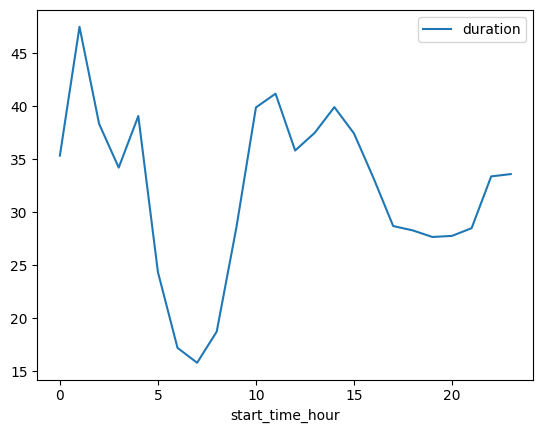

In [280]:
dur_by_year=df[['duration', 'start_time_hour', 'start_time_year']].query('`start_time_year` == 2018').groupby(by='start_time_hour').mean()
dur_by_year[['duration']].plot()

In [281]:
df[['start_station', 'start_time_hour', 'start_time_year']].query('`start_time_year` == 2018').groupby(by='start_time_hour').mean()

/tmp/ipykernel_59594/979875457.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df[['start_station', 'start_time_hour', 'start_time_year']].query('`start_time_year` == 2018').groupby(by='start_time_hour').mean()


,start_time_year
start_time_hour,
0,2018.0
1,2018.0
2,2018.0
3,2018.0
4,2018.0
5,2018.0
6,2018.0
7,2018.0
8,2018.0


In [250]:
df['trip_id']=df.index

In [259]:
# How many trips made between stations
(
    df[['end_station', 'start_station','trip_id']]
    .groupby(['start_station', 'end_station'])[['trip_id']]
    .count()
    .sort_values(by='trip_id', ascending=False)
    .rename(columns = {'trip_id':'trips_made_between_stations'})
    )

trips_made_between_stations
start_station end_station                             
4214          4214                                7930
3030          3014                                6123
4210          4210                                6067
3014          3030                                5364
4214          4215                                4528
...                                                ...
4267          4387                                   0
              4385                                   0
              4384                                   0
              4383                                   0
4327          4143                                   0

[132492 rows x 1 columns]

In [268]:
(
    df[['start_station','trip_id']]
    .groupby('start_station')[['trip_id']]
    .count()
    .rename(columns = {'trip_id':'station_total_trips'})
    .sort_values(by='station_total_trips', ascending=False)
)

,station_total_trips
start_station,
3005,27909
3030,20066
3014,18469
4214,17111
3031,16790
...,...
4374,3
4373,2
3000,1


In [293]:
(
    df[['start_station','trip_id', 'start_time_month']]
    .groupby(['start_time_month', 'start_station'])
    [['trip_id']].count()
    .rename(columns = {'trip_id':'trips_by_month'})
    .sort_values(by='trips_by_month', ascending=False)
)

trips_by_month
start_time_month start_station                
10               3005                     3298
8                3005                     2916
11               3005                     2681
7                3005                     2675
10               3030                     2314
...                                        ...
                 4143                        0
2                4496                        0
                 4492                        0
7                4276                        0
12               4327                        0

[4344 rows x 1 columns]

In [314]:
(
    df[['start_station','trip_id', 'start_time_day_of_week']]
    .groupby(['start_station', 'start_time_day_of_week'])
    [['trip_id']].count()
    .rename(columns = {'trip_id':'trips_by_day'})
    #.sort_values(by='trips_by_month', ascending=False)
)[:50]#.plot()

trips_by_day
start_station start_time_day_of_week              
3005          0                               4075
              1                               4270
              2                               4297
              3                               4463
              4                               4389
              5                               3352
              6                               3063
3006          0                               1683
              1                               1775
              2                               1740
              3                               1804
              4                               1795
              5                               1863
              6                               1753
3007          0                               1673
              1                               1898
              2                               1709
              3                               1688
              4                               1680
              5                               1061
              6                                924
3008          0                               1268
              1                               1325
              2                               1287
              3                               1285
              4                               1271
              5                               1169
              6                               1292
3010          0                                229
              1                                215
              2                                229
              3                                214
              4                                248
              5                                210
              6                                162
3011          0                                680
              1                                721
              2                                773
              3                                739
              4                                824
              5                                792
              6                                756
3013          0                                  9
              1                                 11
              2                                 17
              3                                 14
              4                                 15
              5                                 13
              6                                 65
3014          0                               2946

In [333]:
# Top 60 trips by station and day of the week
stations_by_day=(
    df[['start_station','trip_id', 'start_time_day_of_week']]
    .groupby(['start_station', 'start_time_day_of_week'])
    [['trip_id']].count()
    .rename(columns = {'trip_id':'trips_by_day'})
    .sort_values(by='trips_by_day', ascending=False)
    )
stations_by_day[:60]
#sns.displot(data=stations_by_day, x="start_time_day_of_week", y='trips_by_day', row="start_station")

trips_by_day
start_station start_time_day_of_week              
3005          3                               4463
              4                               4389
              2                               4297
              1                               4270
              0                               4075
3030          3                               3987
              1                               3927
              2                               3866
3014          3                               3560
              1                               3488
3005          5                               3352
4214          6                               3319
3014          2                               3296
3030          4                               3281
4214          5                               3278
3030          0                               3197
3005          6                               3063
3014          0                               2946
              4                               2887
3031          4                               2668
4210          5                               2555
4214          4                               2529
4210          6                               2527
3031          2                               2489
              1                               2488
3035          4                               2424
3031          3                               2416
3082          5                               2345
3031          5                               2322
              0                               2287
3035          3                               2240
              2                               2218
4215          5                               2201
3064          1                               2184
4214          0                               2167
3035          1                               2165
3064          4                               2163
3069          5                               2154
3064          3                               2146
3031          6                               2120
3035          0                               2117
3064          0                               2109
3082          6                               2088
3064          2                               2087
3069          6                               2079
4214          1                               2042
3069          4                               2035
3042          1                               2028
4214          3                               2001
3042          4                               1986
3035          5                               1986
3082          4                               1974
3042          3                               1954
3064          6                               1921
3035          6                               1915
4210          4                               1912
4215          6                               1911
3007          1                               1898
3042          2                               1863
3006          5                               1863

In [336]:
# Top 60 trips by station and day/hour of the week
stations_by_hour=(
    df[['start_station','trip_id', 'start_time_day_of_week', 'start_time_hour']]
    .groupby(['start_station', 'start_time_day_of_week', 'start_time_hour'])
    [['trip_id']].count()
    .rename(columns = {'trip_id':'trips_by_hour'})
    .sort_values(by='trips_by_hour', ascending=False)
    )
stations_by_hour[:60]
#sns.displot(data=stations_by_day, x="start_time_day_of_week", y='trips_by_day', row="start_station")

trips_by_hour
start_station start_time_day_of_week start_time_hour               
3030          3                      16                         857
              1                      16                         841
              2                      16                         772
3014          1                      7                          750
3030          0                      16                         739
3014          3                      7                          715
              2                      7                          656
              1                      8                          639
              0                      7                          625
              2                      8                          617
3030          1                      17                         611
              2                      17                         610
3014          4                      7                          603
              3                      8                          587
3030          3                      17                         582
              1                      15                         563
3014          1                      6                          558
3030          3                      15                         550
              2                      15                         544
3005          3                      18                         521
3014          2                      6                          520
              0                      8                          511
              3                      6                          504
3005          1                      18                         496
3030          4                      15                         495
3005          2                      18                         494
3030          4                      16                         484
3005          0                      18                         483
3014          4                      8                          479
3005          1                      19                         472
3014          0                      6                          451
3030          0                      17                         445
3005          0                      19                         432
              2                      17                         431
3042          1                      7                          427
3030          0                      15                         422
3005          4                      18                         422
              1                      17                         412
              3                      17                         406
                                     19                         405
              2                      19                         405
4214          6                      16                         398
3005          4                      17                         394
4214          6                      14                         387
3030          4                      17                         371
4214          6                      15                         364
              5                      17                         361
                                     14                         361
3042          2                      7                          357
4214          5                      16                         352
                                     13                         352
3005          4                      19                         349
4214          6                      17                         345
              5                      15                         340
3005          0                      17                         339
3014          4                      6                          338
3005          3                      20                         325
3042          3                      7    

In [337]:
# Top 60 trips by station and day/hour of the week
stations_by_hour=(
    df[['start_station','trip_id', 'start_time_day_of_week', 'start_time_hour', 'passholder_type']]
    .groupby(['start_station', 'start_time_day_of_week', 'start_time_hour', 'passholder_type'])
    [['trip_id']].count()
    .rename(columns = {'trip_id':'trips_by_hour'})
    .sort_values(by='trips_by_hour', ascending=False)
    )
stations_by_hour[:60]
#sns.displot(data=stations_by_day, x="start_time_day_of_week", y='trips_by_day', row="start_station")

trips_by_hour
start_station start_time_day_of_week start_time_hour passholder_type               
3030          1                      16              Monthly Pass               802
              3                      16              Monthly Pass               801
              2                      16              Monthly Pass               730
              0                      16              Monthly Pass               705
3014          1                      7               Monthly Pass               704
              3                      7               Monthly Pass               663
              2                      7               Monthly Pass               613
              0                      7               Monthly Pass               599
              4                      7               Monthly Pass               563
              1                      8               Monthly Pass               557
3030          1                      17              Monthly Pass               553
3014          2                      8               Monthly Pass               545
3030          2                      17              Monthly Pass               535
              1                      15              Monthly Pass               532
              3                      17              Monthly Pass               521
3014          3                      8               Monthly Pass               512
              1                      6               Monthly Pass               498
3030          3                      15              Monthly Pass               497
              2                      15              Monthly Pass               479
3014          0                      8               Monthly Pass               461
3030          4                      15              Monthly Pass               456
3014          2                      6               Monthly Pass               456
              3                      6               Monthly Pass               454
3030          4                      16              Monthly Pass               443
3014          4                      8               Monthly Pass               420
3030          0                      17              Monthly Pass               407
3014          0                      6               Monthly Pass               406
3005          2                      18              Monthly Pass               404
3042          1                      7               Monthly Pass               403
3005          3                      18              Monthly Pass               398
              1                      18              Monthly Pass               389
              0                      18              Monthly Pass               388
3030          0                      15              Monthly Pass               388
3005          1                      19              Monthly Pass               352
              2                      17              Monthly Pass               344
              4                      18              Monthly Pass               340
3042          2                      7               Monthly Pass               335
3005          1                      17              Monthly Pass               324
              3                      19              Monthly Pass               324
4214          6                      16              Walk-up                    323
3005          0                      19              Monthly Pass               321
              2                      19              Monthly Pass               319
4214          6                      14              Walk-up                    310
3005          3                      17              Monthly Pass               308
3030          4                      17              Monthly Pass               308
3005          4                      17              Monthly Pass               308
3042          3                      7

In [338]:
# Passholder type behaoviour by day of week
passholder_by_weekday=(
    df[['trip_id', 'start_time_day_of_week', 'passholder_type']]
    .groupby(['passholder_type', 'start_time_day_of_week', ])
    [['trip_id']].count()
    .rename(columns = {'trip_id':'trip_count'})
    )
passholder_by_weekday[:60]
#sns.displot(data=stations_by_day, x="start_time_day_of_week", y='trips_by_day', row="start_station")

trip_count
passholder_type start_time_day_of_week            
Annual Pass     0                             4853
                1                             5422
                2                             5171
                3                             5084
                4                             5402
                5                             3640
                6                             3401
Flex Pass       0                             1480
                1                             1649
                2                             1738
                3                             1794
                4                             1793
                5                             1595
                6                             1371
Monthly Pass    0                            57556
                1                            63410
                2                            62037
                3                            62255
                4                            60480
                5                            41981
                6                            39560
One Day Pass    0                             4362
                1                             3832
                2                             4046
                3                             4189
                4                             5420
                5                             8724
                6                             9315
Walk-up         0                            23679
                1                            23942
                2                            22654
                3                            23967
                4                            29153
                5                            40654
                6                            39818

Text(0.5, 0.98, 'Passholder behaviour by day of week')

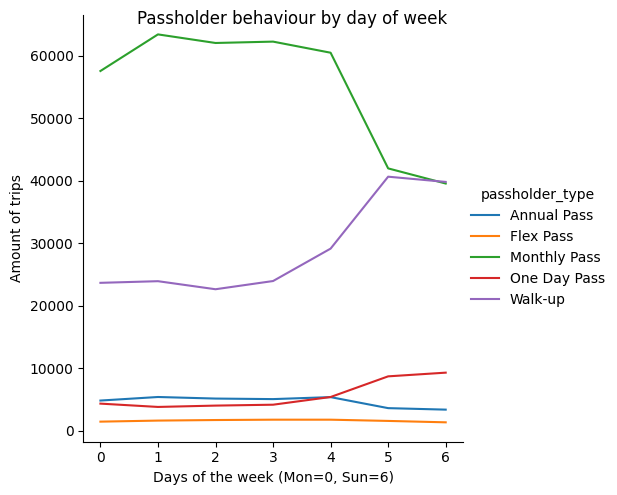

In [347]:
g_passholder_by_weekday=sns.relplot(
    data=passholder_by_weekday,
    x='start_time_day_of_week',
    y='trip_count',
    hue='passholder_type',
    kind='line'
    )

(
    g_passholder_by_weekday
    .set_axis_labels("Days of the week (Mon=0, Sun=6)", "Amount of trips")
    .fig.suptitle("Passholder behaviour by day of week")
    )

In [352]:
# Passholder type behaoviour by day of week
passholder_by_day_of_year=(
    df[['trip_id', 'start_time_year', 'start_time_day_of_year', 'passholder_type']]
    .groupby(['passholder_type', 'start_time_year', 'start_time_day_of_year' ])
    [['trip_id']].count()
    .rename(columns = {'trip_id':'trip_count'})
    )
passholder_by_day_of_year
#sns.displot(data=stations_by_day, x="start_time_day_of_week", y='trips_by_day', row="start_station")

trip_count
passholder_type start_time_year start_time_day_of_year            
Annual Pass     2016            1                                0
                                2                                0
                                3                                0
                                4                                0
                                5                                0
...                                                            ...
Walk-up         2021            362                            100
                                363                             17
                                364                              6
                                365                            107
                                366                              0

[10980 rows x 1 columns]

Text(0.5, 0.98, 'Passholder behaviour by day of year')

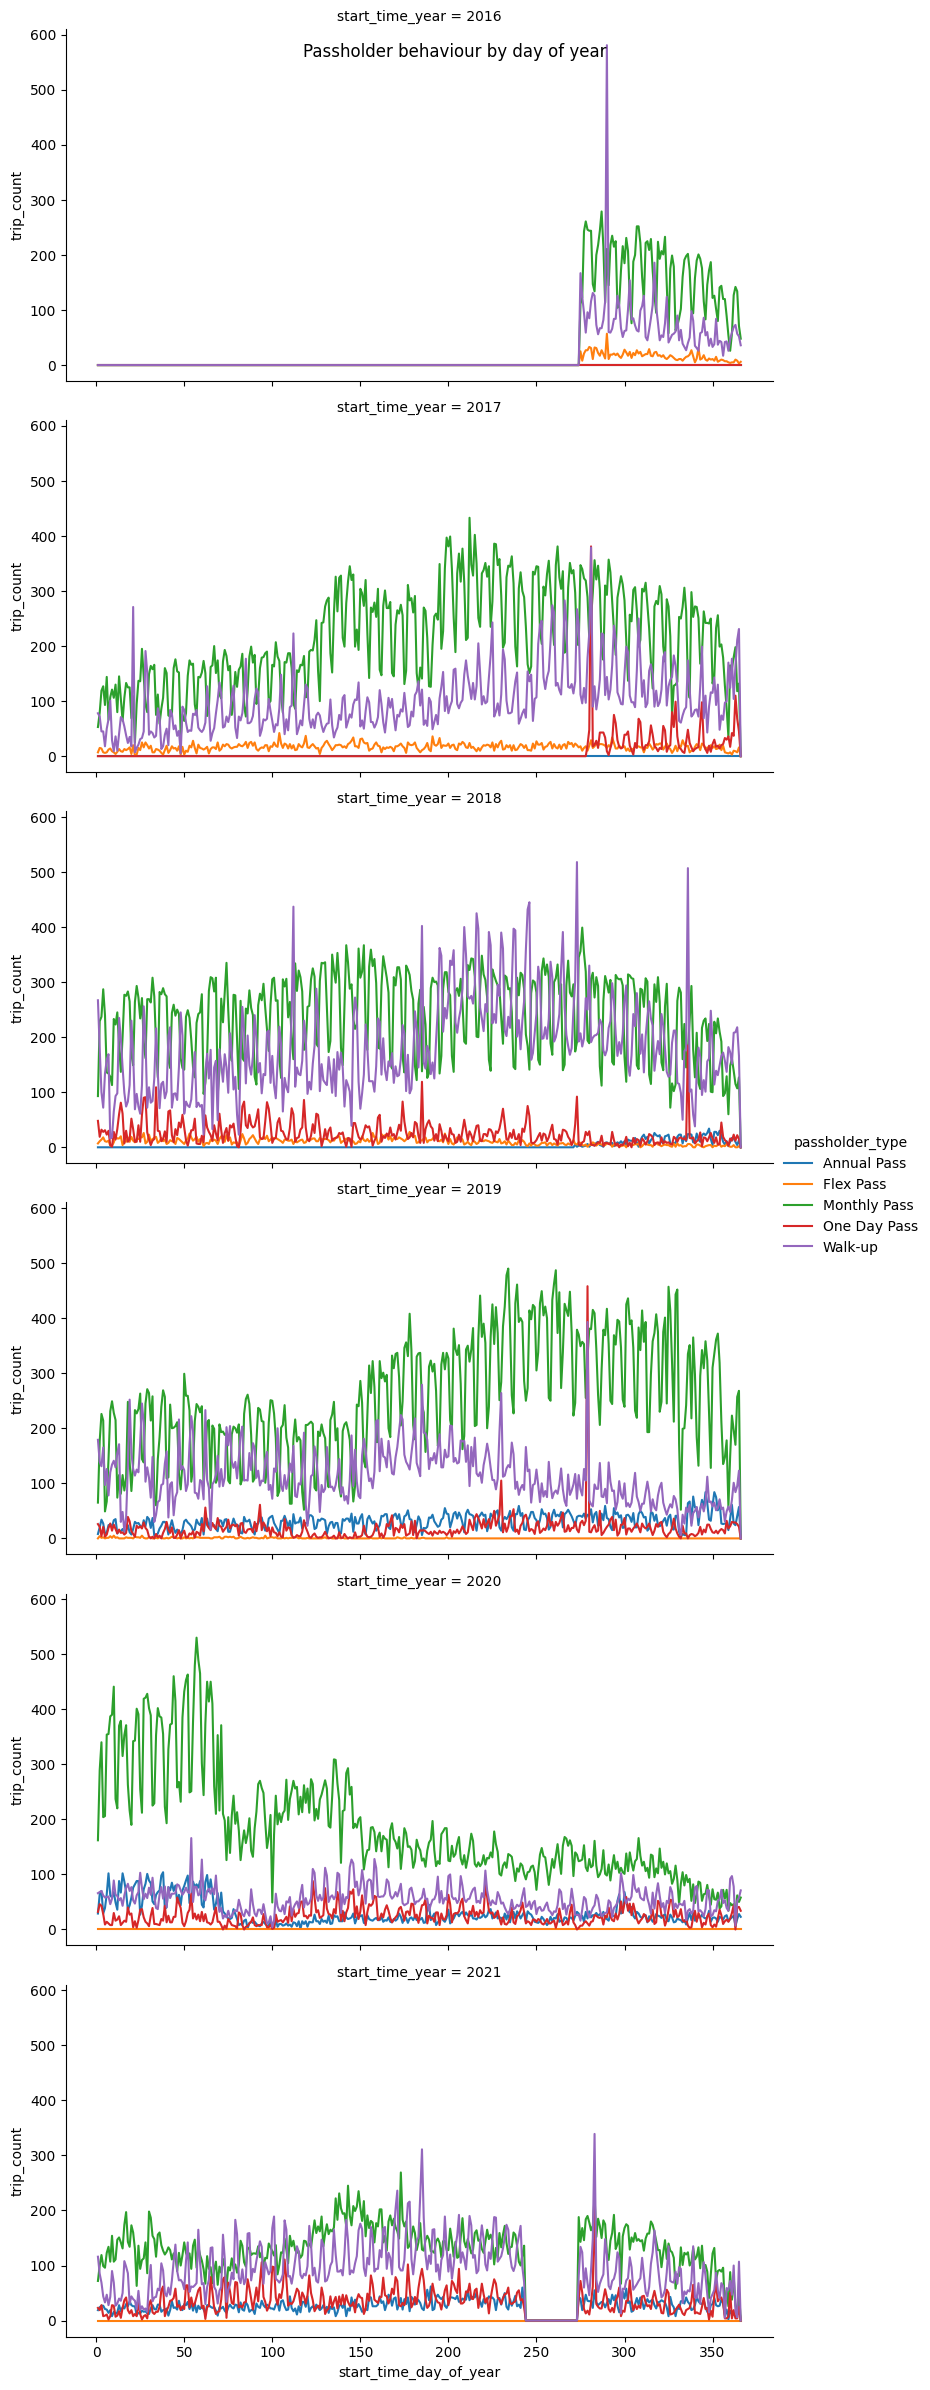

In [360]:
g_passholder_by_day_of_year=sns.relplot(
    data=passholder_by_day_of_year,
    x='start_time_day_of_year',
    y='trip_count',
    hue='passholder_type',
    row='start_time_year',
    kind='line',
    height=4, aspect=2
    )

#g_passholder_by_day_of_year.set_xticks(range(12))
g_passholder_by_day_of_year.fig.suptitle("Passholder behaviour by day of year")

In [294]:
df.columns

Index(['duration', 'start_time', 'end_time', 'start_lat', 'start_lon',
       'end_lat', 'end_lon', 'bike_id', 'plan_duration', 'trip_route_category',
       'passholder_type', 'start_station', 'end_station', 'start_time_year',
       'start_time_quarter', 'start_time_month', 'start_time_day',
       'start_time_day_of_week', 'start_time_day_of_year',
       'start_time_weekofyear', 'start_time_is_month_end',
       'start_time_is_month_start', 'start_time_is_quarter_end',
       'start_time_is_quarter_start', 'start_time_is_year_end',
       'start_time_is_year_start', 'start_time_time', 'start_time_hour',
       'start_time_minute', 'start_time_second', 'start_time_is_weekend',
       'start_time_day_part', 'end_time_year', 'end_time_quarter',
       'end_time_month', 'end_time_day', 'end_time_day_of_week',
       'end_time_day_of_year', 'end_time_weekofyear', 'end_time_is_month_end',
       'end_time_is_month_start', 'end_time_is_quarter_end',
       'end_time_is_quarter_start', 'en

In [306]:
df[['']]

,start_time_day_of_week
trip_id,
101750280,1
46560345,6
120016336,0
129547190,6
136619463,4
...,...
83666862,2
132547303,1
67332628,5


In [132]:
station_freq=df.groupby(['start_station', 'end_station']).size().reset_index(name='Freq').sort_values(by='Freq', ascending=False)
station_freq

,start_station,end_station,Freq
43675,4214,4214,7930
7328,3030,3014,6123
42207,4210,4210,6067
2583,3014,3030,5364
43676,4214,4215,4528
...,...,...,...
49604,4267,4387,0
49603,4267,4385,0
49602,4267,4384,0
49601,4267,4383,0


In [110]:
station_freq

,start_station,end_station,Freq
43675,4214,4214,7930
7328,3030,3014,6123
42207,4210,4210,6067
2583,3014,3030,5364
43676,4214,4215,4528
...,...,...,...
49604,4267,4387,0
49603,4267,4385,0
49602,4267,4384,0
49601,4267,4383,0


In [113]:
station_freq[station_freq['Freq'] > 1000]

,start_station,end_station,Freq
43675,4214,4214,7930
7328,3030,3014,6123
42207,4210,4210,6067
2583,3014,3030,5364
43676,4214,4215,4528
44042,4215,4215,3620
0,3005,3005,3152
42212,4210,4215,2944
63126,4345,4345,2522
7686,3031,3005,2376


In [245]:
# Movement dataset for plotting

movement_df=df.loc[:, ['start_time', 'end_time', 'start_lat', 'start_lon', 'end_lat', 'end_lon', 'start_station', 'end_station']]
movement_df['trip_ID']=movement_df.index

def write_feature(row):
    feature=({
        'type': 'Feature',
        'properties': {"trip_id": row[-1], "start_station": row[-3], "end_station": row[-2],
                        "start_time": str(row[0]), "end_time": str(row[1])},
        'geometry': {"type": "LineString", "coordinates": [[row[3], row[2]], [row[5], row[4]]]}})
    
    features.append(feature)

features=[]
movement_df.apply(write_feature, axis=1)

geojson={"type": 'FeatureCollection', "features": features}

with open("/workspace/data/movement.json", "w") as write_file:
    json.dump(geojson, write_file)

In [394]:
# get all stations
ends=df.loc[:, ['end_station', 'end_lat', 'end_lon']].rename(columns={"end_station": "station", "end_lat":'lat', "end_lon": "lon"})
starts=df.loc[:, ['start_station', 'start_lat', 'start_lon']].rename(columns={"start_station": "station", "start_lat":'lat', "start_lon": "lon"})
stations=pd.concat([ends, starts]).drop_duplicates('station')

In [396]:
stations

,station,lat,lon
trip_id,,,
101750280,4127,33.748920,-118.275192
46560345,3062,34.047749,-118.243172
129547190,4311,34.059689,-118.294662
136619463,4443,34.021660,-118.278687
63406498,4158,34.135250,-118.132370
...,...,...,...
123944431,4363,34.030460,-118.389099
120677743,4327,34.172451,-118.370369
131729653,4468,34.013741,-118.283730


In [397]:
# Stations map
def write_feature(row):
    feature=({
        'type': 'Feature',
        'properties': {"station": row[0]},
        'geometry': {"type": "Point", "coordinates": [row[2], row[1]]}
        })
    
    features.append(feature)

features=[]
stations.apply(write_feature, axis=1)

geojson={"type": 'FeatureCollection', "features": features}

with open("/workspace/data/stations.json", "w") as write_file:
    json.dump(geojson, write_file)

In [135]:
df.columns

Index(['duration', 'start_time', 'end_time', 'start_lat', 'start_lon',
       'end_lat', 'end_lon', 'bike_id', 'plan_duration', 'trip_route_category',
       'passholder_type', 'start_station', 'end_station', 'start_time:year',
       'start_time:quarter', 'start_time:month', 'start_time:day',
       'start_time:day_of_week', 'start_time:day_of_year',
       'start_time:weekofyear', 'start_time:is_month_end',
       'start_time:is_month_start', 'start_time:is_quarter_end',
       'start_time:is_quarter_start', 'start_time:is_year_end',
       'start_time:is_year_start', 'start_time:time', 'start_time:hour',
       'start_time:minute', 'start_time:second', 'start_time:is_weekend',
       'start_time:day_part', 'end_time:year', 'end_time:quarter',
       'end_time:month', 'end_time:day', 'end_time:day_of_week',
       'end_time:day_of_year', 'end_time:weekofyear', 'end_time:is_month_end',
       'end_time:is_month_start', 'end_time:is_quarter_end',
       'end_time:is_quarter_start', 'en

In [20]:
df.dtypes

duration                      float64
start_time             datetime64[ns]
end_time               datetime64[ns]
start_lat                     float64
start_lon                     float64
end_lat                       float64
end_lon                       float64
bike_id                      category
plan_duration                category
trip_route_category          category
passholder_type              category
start_station                category
end_station                  category
dtype: object

In [14]:
d = pd.DataFrame([['red','x',1,1], ['red','x',0,1], ['black','y',0,2], ['red','y',1,0], ['red','y',2,0], ['black','x',2,1]], columns=['A','B','C','D'])
print(df)

       A  B  C  D
0    red  x  1  1
1    red  x  0  1
2  black  y  0  2
3    red  y  1  0
4    red  y  2  0
5  black  x  2  1


In [15]:
pd.pivot_table(d, values=['C','D'], index=['A'], columns=['B'], aggfunc=np.sum)

C     D   
B      x  y  x  y
A                
black  2  0  1  2
red    1  3  2  0

In [18]:
pd.pivot_table(d, values=['C','D'],index=['A'],columns=['B'],aggfunc={'C': np.sum, 'D': [min, max, np.mean]})

C      D                    
      sum    max    mean      min   
B       x  y   x  y    x    y   x  y
A                                   
black   2  0   1  2  1.0  2.0   1  2
red     1  3   1  0  1.0  0.0   1  0

# DATA VIZ

In [66]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
duration,675626.0,31.093780,92.754909,1.000000,7.000000,13.000000,25.000000,1440.000000
start_lat,675626.0,34.044957,0.320028,33.710979,34.038609,34.046612,34.051941,55.705528
start_lon,675626.0,-118.253718,2.295352,-118.495422,-118.280182,-118.256668,-118.246422,118.238258
end_lat,675626.0,34.043957,0.290402,33.710979,34.037460,34.046520,34.050911,55.705528
end_lon,675626.0,-118.260350,2.061822,-118.495422,-118.280510,-118.256980,-118.246422,37.606541
plan_duration,675626.0,44.824709,92.207201,0.000000,1.000000,30.000000,30.000000,999.000000
start_station,675626.0,3487.031890,611.564384,3000.000000,3030.000000,3064.000000,4211.000000,4594.000000
end_station,675626.0,3486.696184,611.253304,3000.000000,3031.000000,3064.000000,4212.000000,4594.000000


In [11]:
train_df.columns

Index(['duration', 'start_time', 'end_time', 'start_lat', 'start_lon',
       'end_lat', 'end_lon', 'bike_id', 'plan_duration', 'trip_route_category',
       'passholder_type', 'start_station', 'end_station'],
      dtype='object')

In [10]:
cat=['plan_duration', 'trip_route_category', 'passholder_type', 'start_station', 'end_station', 'bike_id']
num=['duration', 'start_time', 'end_time', ]

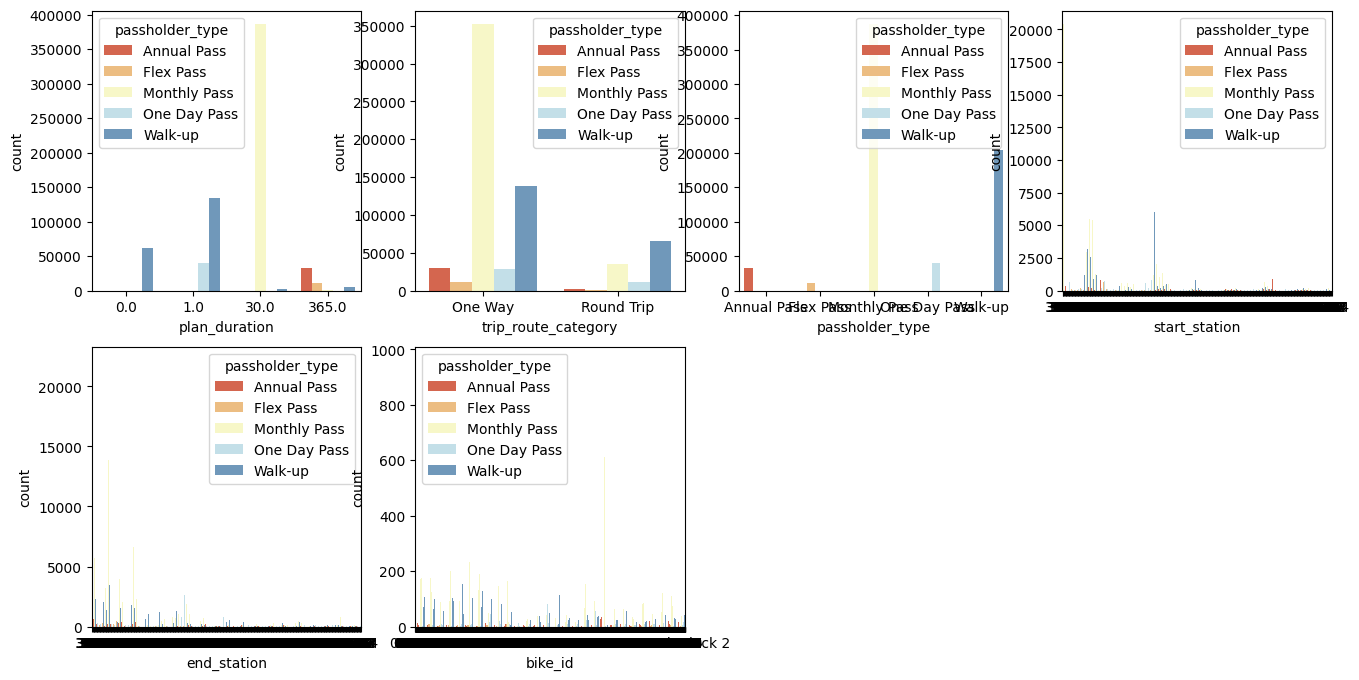

In [14]:
fig=plt.figure(figsize=(16,8))

for i in range(len(cat)):
    column=cat[i]
    sub=fig.add_subplot(2, 4, i + 1)
    chart= sns.countplot(data=train_df, x=column, hue='passholder_type', palette='RdYlBu' )

In [70]:
train_df.groupby('plan_duration')['plan_duration'].count()

plan_duration
0.0       61816
1.0      174132
30.0     389151
365.0     50328
Name: plan_duration, dtype: int64

In [72]:
#list(df[["duration"]].value_counts().index.values)
train_df_no_out[['duration']].describe().T

,count,mean,std,min,25%,50%,75%,max
duration,675427.0,29.391675,71.168169,1.0,7.0,13.0,25.0,806.5


In [76]:
train_df_no_out['duration']

trip_id
101750280     35.0
46560345      32.0
120016336      6.0
129547190    138.0
136619463     14.0
             ...  
83666862      17.0
132547303      9.0
67332628       6.0
114846232      3.0
167744702     59.0
Name: duration, Length: 675427, dtype: float64

In [78]:
train_df_no_out.columns

Index(['duration', 'start_time', 'end_time', 'start_lat', 'start_lon',
       'end_lat', 'end_lon', 'bike_id', 'plan_duration', 'trip_route_category',
       'passholder_type', 'start_station', 'end_station'],
      dtype='object')

<AxesSubplot: xlabel='duration', ylabel='trip_route_category'>

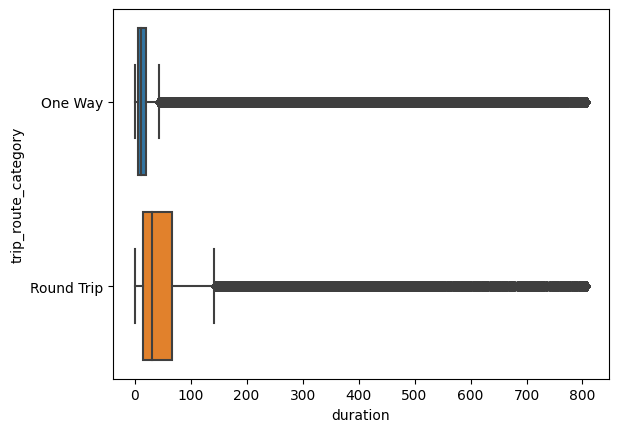

In [79]:
sns.boxplot(data=train_df_no_out, x='duration', y='trip_route_category')

<AxesSubplot: xlabel='duration', ylabel='passholder_type'>

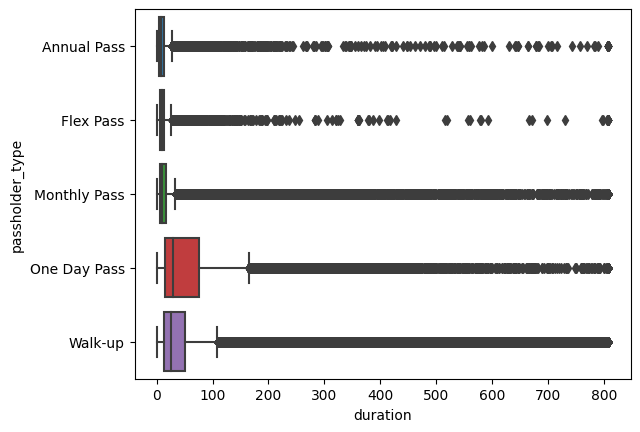

In [77]:
sns.boxplot(data=train_df_no_out, x='duration', y='passholder_type')

In [81]:
test_map_df=train_df_no_out[['start_lat','start_lon']]
BBox = (test_map_df.start_lon.min(),   test_map_df.start_lon.max(),
        test_map_df.start_lat.min(), test_map_df.start_lat.max())
print(BBox)

(-118.495422, 118.238258, 33.710979, 55.705528)


In [21]:
marker_cluster=[]

coordinates=df[['start_lat','start_lon']].to_numpy()
coordinates[:3]

array([[  33.74892 , -118.275192],
       [  34.035679, -118.270813],
       [  34.04607 , -118.233093]])

### test ipyleaflet

In [ ]:
from ipyleaflet import Map
from ipyleaflet import basemaps
from ipyleaflet import Marker
from ipyleaflet import MarkerCluster

markers=[]
[markers.append(Marker(location=(coord[0] , coord[1]))) for coord in coordinates]

In [156]:
markers[:10]

[Marker(location=[33.74892, -118.275192], options=['alt', 'draggable', 'keyboard', 'rise_offset', 'rise_on_hover', 'rotation_angle', 'rotation_origin', 'title', 'z_index_offset']),
 Marker(location=[34.035679, -118.270813], options=['alt', 'draggable', 'keyboard', 'rise_offset', 'rise_on_hover', 'rotation_angle', 'rotation_origin', 'title', 'z_index_offset']),
 Marker(location=[34.04607, -118.233093], options=['alt', 'draggable', 'keyboard', 'rise_offset', 'rise_on_hover', 'rotation_angle', 'rotation_origin', 'title', 'z_index_offset']),
 Marker(location=[34.06258, -118.290092], options=['alt', 'draggable', 'keyboard', 'rise_offset', 'rise_on_hover', 'rotation_angle', 'rotation_origin', 'title', 'z_index_offset']),
 Marker(location=[34.026291, -118.277687], options=['alt', 'draggable', 'keyboard', 'rise_offset', 'rise_on_hover', 'rotation_angle', 'rotation_origin', 'title', 'z_index_offset']),
 Marker(location=[34.13525, -118.13237], options=['alt', 'draggable', 'keyboard', 'rise_offse

In [21]:
from ipyleaflet import Map
from ipyleaflet import basemaps
from ipyleaflet import Marker
from ipyleaflet import MarkerCluster

# Map centred on (60 degrees latitude et -2.2 degrees longitude)
# Latitude, longitude
m = Map(center = (34.0500,-118.2240), zoom = 10, min_zoom = 1,
            max_zoom = 20, basemap=basemaps.Stamen.Terrain)

marker_cluster = MarkerCluster(
    markers=markers[:10]
)

m.add_layer(marker_cluster)

m

NameError: name 'markers' is not defined

In [47]:
heatmap_coords=[]
[heatmap_coords.append([coord[0],coord[1], 1]) for coord in coordinates[:20000]]
heatmap_coords[:3]

[[33.74892, -118.275192, 1],
 [34.035679, -118.270813, 1],
 [34.04607, -118.233093, 1]]

In [48]:
from ipyleaflet import Map
from ipyleaflet import basemaps
from ipyleaflet import Marker
from ipyleaflet import Heatmap

# Map centred on (60 degrees latitude et -2.2 degrees longitude)
# Latitude, longitude
hm = Map(center = (34.0500,-118.2240), zoom = 2, min_zoom = 1,
            max_zoom = 20, basemap=basemaps.Stamen.Terrain)

heatmap = Heatmap(
    locations=heatmap_coords,
    radius=20
)

hm.add_layer(heatmap)

hm

Map(center=[34.05, -118.224], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoo…

### test datashader

In [28]:
import datashader as ds
import pandas as pd
import colorcet as cc

In [29]:
df[['start_lat','start_lon']]

,start_lat,start_lon
trip_id,,
101750280,33.748920,-118.275192
46560345,34.035679,-118.270813
120016336,34.046070,-118.233093
129547190,34.062580,-118.290092
136619463,34.026291,-118.277687
...,...,...
83666862,34.049889,-118.255882
132547303,34.039188,-118.232529
67332628,34.049889,-118.255882


### test Kepler

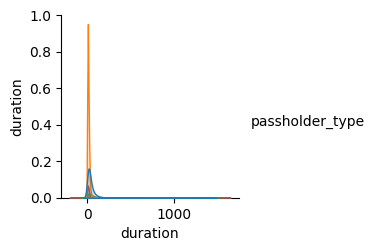

In [58]:
sns.pairplot(data=df, vars=['duration'], hue="passholder_type")

## Histograms

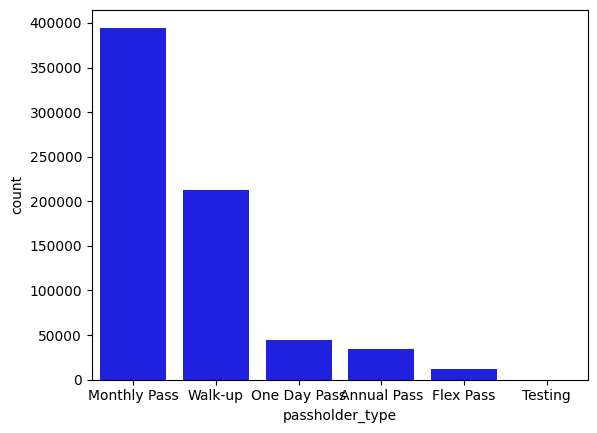

In [52]:
sns.countplot(x = 'passholder_type', data = df, color = 'blue', order = df['passholder_type'].value_counts().index)

<AxesSubplot: xlabel='duration', ylabel='Count'>

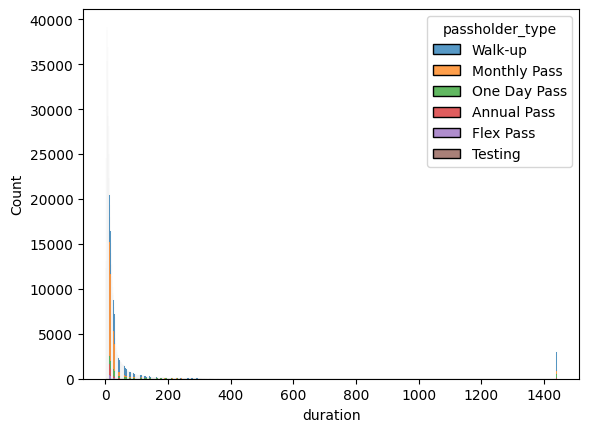

In [60]:
sns.histplot(data=df, x="duration", hue="passholder_type", multiple="stack")

In [ ]:
fig, axes = plt.subplots(3, 2, figsize = (18, 18))
fig.suptitle('Bar plot for all categorical variables in the dataset')
sns.countplot(ax = axes[0, 0], x = 'Fuel_Type', data = data, color = 'blue', 
              order = data['Fuel_Type'].value_counts().index);
sns.countplot(ax = axes[0, 1], x = 'Transmission', data = data, color = 'blue', 
              order = data['Transmission'].value_counts().index);
sns.countplot(ax = axes[1, 0], x = 'Owner_Type', data = data, color = 'blue', 
              order = data['Owner_Type'].value_counts().index);
sns.countplot(ax = axes[1, 1], x = 'Location', data = data, color = 'blue', 
              order = data['Location'].value_counts().index);
sns.countplot(ax = axes[2, 0], x = 'Brand', data = data, color = 'blue', 
              order = data['Brand'].head(20).value_counts().index);
sns.countplot(ax = axes[2, 1], x = 'Model', data = data, color = 'blue', 
              order = data['Model'].head(20).value_counts().index);
axes[1][1].tick_params(labelrotation=45);
axes[2][0].tick_params(labelrotation=90);
axes[2][1].tick_params(labelrotation=90);

### STATS

In [10]:
#Correlation 

df.corr()

/tmp/ipykernel_859/1008123944.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,trip_id,duration,start_lat,start_lon,end_lat,end_lon,plan_duration,start_station,end_station
trip_id,1.000000,0.034878,-0.000683,0.001853,-0.002211,0.000447,0.073506,0.348450,0.339619
duration,0.034878,1.000000,-0.005112,0.000859,-0.008140,-0.000015,-0.060064,0.097333,0.054521
start_lat,-0.000683,-0.005112,1.000000,0.983237,0.635684,0.622860,0.014488,-0.003942,-0.004703
start_lon,0.001853,0.000859,0.983237,1.000000,0.616067,0.623930,0.004952,0.002344,0.002347
end_lat,-0.002211,-0.008140,0.635684,0.616067,1.000000,0.988989,0.015360,-0.007832,-0.006811
end_lon,0.000447,-0.000015,0.622860,0.623930,0.988989,1.000000,0.005920,-0.001386,-0.001230
plan_duration,0.073506,-0.060064,0.014488,0.004952,0.015360,0.005920,1.000000,-0.055573,-0.057813
start_station,0.348450,0.097333,-0.003942,0.002344,-0.007832,-0.001386,-0.055573,1.000000,0.802540
end_station,0.339619,0.054521,-0.004703,0.002347,-0.006811,-0.001230,-0.057813,0.802540,1.000000


/tmp/ipykernel_859/1925012855.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<AxesSubplot: >

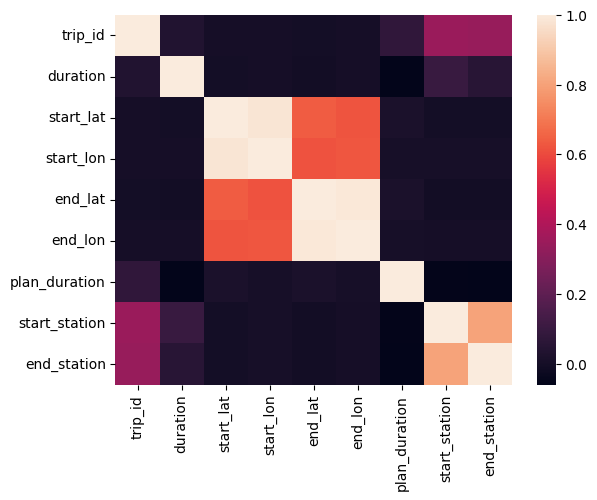

In [11]:
#Correlation plot

sns.heatmap(df.corr())

### Feature Engineering